## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

This has two sections:
* Linear Regression
* Kernel Regression




# Section 1:

**Linear Regression**

We will use the Boston_housing dataset for the regression problem. Run the below cell to get the following variables:
* `Training_data` = Training data matrix of shape $(n, d)$
* `labels` = label vector corresponding to the training data
* `test_data` = Test data matrix of shape $(n_1, d)$ where $n_1$ is the number of examples in test dataset.
* `test_labels` = label vector corresponding to the test data

Use this dataset for the regression problem.

In [3]:
from keras.datasets import boston_housing
Train, test = boston_housing.load_data(seed= 111)
Training_data, labels = Train[0], Train[1]
Test_data, test_labels = test[0], test[1]

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Question 1
How many examples are there in the training dataset?



In [4]:
Training_data.shape[0]

404

## Question 2
How many examples are there in the test dataset?



In [5]:
Test_data.shape[0]

102

## Question 3

How many features are there in the dataset?



In [6]:
Training_data.shape[1]

13

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbb{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature, $\mathbb{x}$ is the feature matrix of shape $(d, n)$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbb{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbb{x}$ is of shape $(d+1, n)$ where the first row of $\mathbb{x}$ has entries as 1.


## Task

Add the dummy feature in the feature matrix `Training_data` and test data matrix `test_data`. We will be using this new feature matrices (after adding te dummy feature) for learning the model.

Note: As per your convenience, you can convert the shape of the training dataset to $(d, n)$.

In [7]:
# Add a column of ones (dummy feature) to Training_data and test_data
Training_data = np.c_[np.ones(Training_data.shape[0]), Training_data]
Test_data = np.c_[np.ones(Test_data.shape[0]), Test_data]

# Transpose the matrices to (d, n) shape
Training_data = Training_data.T
Test_data = Test_data.T

# Verify the new shapes
print("Training data shape:", Training_data.shape)
print("Test data shape:", Test_data.shape)

Training data shape: (14, 404)
Test data shape: (14, 102)


## Question 4
If the solution of optimization problem is obtained by setting the first derivative of loss function (squared loss) to zero, find the value of $w_0+w_1+...w_d$.




In [8]:
# Define the target values
train_targets = Train[1]
test_targets = test[1]

# Calculate the coefficients (w) using the normal equation
w = np.linalg.inv(Training_data @ Training_data.T) @ Training_data @ train_targets

# Calculate the sum of coefficients
sum_of_coefficients = np.sum(w)

print("Sum of coefficients (w0 + w1 + ... + wd):", sum_of_coefficients)

Sum of coefficients (w0 + w1 + ... + wd): 20.524582464658266


## Question 5
Find the average of the predictions made by the above model.



In [9]:
# Calculate the predictions using the test data and coefficients (w)
predictions = np.dot(Test_data.T, w)

# Calculate the average of the predictions
average_prediction = np.mean(predictions)

print("Average of the predictions:", average_prediction)

Average of the predictions: 24.168028424007513


## Question 6

Find the loss for the training data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [10]:

# Calculate the predictions for the training data using the model
train_predictions = np.dot(Training_data.T, w)

# Calculate the squared loss for each data point
squared_loss = (train_targets - train_predictions) ** 2

# Calculate the total loss
total_loss = np.sum(squared_loss)

print("Total loss for the training data:", total_loss)

Total loss for the training data: 8372.59143609235


## Question 7

Find the loss for the test data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [11]:
# Calculate the predictions for the test data using the model
test_predictions = np.dot(Test_data.T, w)

# Calculate the squared loss for each test data point
squared_loss_test = (test_targets - test_predictions) ** 2

# Calculate the total loss for the test data
total_loss_test = np.sum(squared_loss_test)

print("Total loss for the test data:", total_loss_test)

Total loss for the test data: 2895.166438352402


## Question 8
Find the weights using the gradient descent. Use a constant learning rate of $\eta = 10^{-10}$. Initialize the weight vector as zero vector and update the weights for 100 iterations. Enter the sum of all the weights.



In [12]:
# Initialize the weight vector as a zero vector
w = np.zeros(Training_data.shape[0])

# Learning rate
eta = 1e-10

# Number of iterations
num_iterations = 100

# Perform gradient descent
for _ in range(num_iterations):
    # Calculate the predictions
    predictions = np.dot(w, Training_data)

    # Calculate the gradient of the loss with respect to the weights
    gradient = -2 * np.dot(Training_data, (train_targets - predictions))

    # Update the weights
    w -= eta * gradient

# Calculate the sum of all the weights
sum_of_weights = np.sum(w)

print("Sum of all the weights:", sum_of_weights)

Sum of all the weights: 0.0589590611959026


## Question 9

Find the loss for the training data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [13]:
# Calculate the predictions for the training data using the learned model
train_predictions = np.dot(w, Training_data)

# Calculate the squared loss for each training data point
squared_loss_train = (train_targets - train_predictions) ** 2

# Calculate the total loss for the training data
total_loss_train = np.sum(squared_loss_train)

print("Total loss for the training data after gradient descent:", total_loss_train)

Total loss for the training data after gradient descent: 50111.69748305857


## Question 10

Find the loss for the test data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [14]:
# Calculate the predictions for the test data using the model learned through gradient descent
test_predictions = np.dot(w, Test_data)

# Calculate the squared loss for each test data point
squared_loss_test = (test_targets - test_predictions) ** 2

# Calculate the total loss for the test data
total_loss_test = np.sum(squared_loss_test)

print("Total loss for the test data with gradient descent:", total_loss_test)

Total loss for the test data with gradient descent: 12262.446974014316


## Question 11
Find the weights using the stochastic gradient descent. Use a constant learning rate of $\eta = 10^{-8}$. Initialize the weight vector as zero vector and update the weights for 1000 iterations. . Take the batch size of $⌈\text{number of samples}/5⌉ $. For sampling the batch examples in $ith$ iteration, set seed at $i$. The final weight is the last updated weight. Do not take the avearge of weights updated in all the iterations. Enter the sum of all the weights.




In [15]:
# Initialize the weight vector as a zero vector
w = np.zeros(Training_data.shape[0])

# Learning rate
eta = 1e-8

# Number of iterations
num_iterations = 1000

# Batch size
batch_size = np.ceil(Training_data.shape[1] / 5).astype(int)

# Perform stochastic gradient descent
for iteration in range(num_iterations):
    # Set the random seed based on the iteration number
    np.random.seed(iteration)

    # Shuffle the data and labels in the same way
    random_order = np.random.permutation(Training_data.shape[1])
    shuffled_data = Training_data[:, random_order]
    shuffled_labels = train_targets[random_order]

    for batch_start in range(0, Training_data.shape[1], batch_size):
        # Get a batch of data and labels
        batch_data = shuffled_data[:, batch_start:batch_start + batch_size]
        batch_labels = shuffled_labels[batch_start:batch_start + batch_size]

        # Calculate the predictions for the batch
        batch_predictions = np.dot(w, batch_data)

        # Calculate the gradient of the loss with respect to the weights for the batch
        gradient = -2 * np.dot(batch_data, (batch_labels - batch_predictions))

        # Update the weights for the batch
        w -= eta * gradient

# Calculate the sum of all the weights
sum_of_weights = np.sum(w)

print("Sum of all the weights after SGD with batching:", sum_of_weights)

Sum of all the weights after SGD with batching: 0.09252385789900144


## Question 12

Find the loss for the training data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [16]:
# Calculate the predictions for the training data using the model learned through stochastic gradient descent
train_predictions = np.dot(w, Training_data)

# Calculate the squared loss for each training data point
squared_loss_train = (train_targets - train_predictions) ** 2

# Calculate the total loss for the training data
total_loss_train = np.sum(squared_loss_train)

print("Total loss for the training data with SGD:", total_loss_train)

Total loss for the training data with SGD: 26312.45255282104


## Question 13

Find the loss for the test data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.


In [17]:
# Calculate the predictions for the test data using the model learned through stochastic gradient descent
test_predictions = np.dot(w, Test_data)

# Calculate the squared loss for each test data point
squared_loss_test = (test_targets - test_predictions) ** 2

# Calculate the total loss for the test data
total_loss_test = np.sum(squared_loss_test)

print("Total loss for the test data with SGD:", total_loss_test)

Total loss for the test data with SGD: 6313.029972443225


# Section 2:

**kernel Regression**

We will generate the synthetic dataset for the kernel regression problem. Run the following cell to get the following variables:

`X` = Training data matrix of shape $(n, d)$. In the given dataset $d = 1$.

`y` = label vector corresponding to the training dataset

In [18]:
rng = np.random.default_rng(seed = 101)
X = np.arange(-2, 2, 0.01).reshape(-1, 1)
y = X**3 + rng.normal(0, 1, X.shape[0]).reshape(-1, 1)


## Question 14

Plot the scatter plot between feature and the labels. Enter your answer as 0.



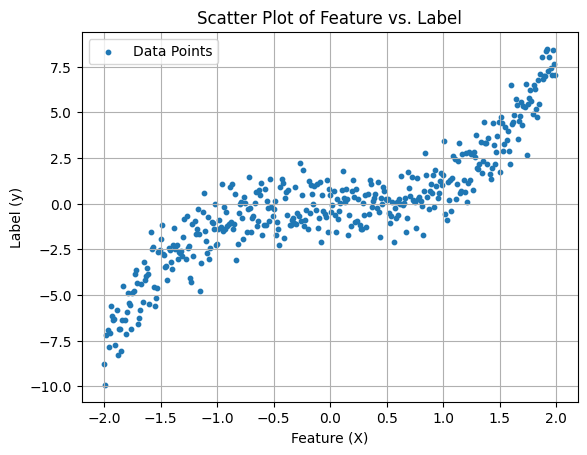

In [19]:
# Create the scatter plot
plt.scatter(X, y, label='Data Points', s=10)  # s is the size of the points
plt.title('Scatter Plot of Feature vs. Label')
plt.xlabel('Feature (X)')
plt.ylabel('Label (y)')
plt.legend()
plt.grid(True)
plt.show()

## Question 15
How many examples are there in the training dataset?



In [20]:
num_examples = X.shape[0]
num_examples

400

## Task:

Add the dummy feature in the feature matrix `X`and reshape it to the shape $(d, n)$.

In [21]:
X_with_dummy = np.hstack([np.ones((X.shape[0], 1)), X])
d, n = X_with_dummy.shape

print("Shape of X with dummy feature:", X_with_dummy.shape)

Shape of X with dummy feature: (400, 2)


## Question 16

Our task is to apply the kernel regression with polynomial kernel of degree 3. We know that weight vector can be written as

$$w = \phi(\mathbb{x})\alpha$$

let us call the vector $\alpha$ as coefficient vector. Find the sum of elements in the coefficient vector.



In [22]:
# Define the polynomial kernel function (degree 3)
def polynomial_kernel(x1, x2, degree=3):
    return (np.dot(x1, x2) + 1) ** degree

# Compute the kernel matrix
n_samples = X.shape[0]
K = np.zeros((n_samples, n_samples))
for i in range(n_samples):
    for j in range(n_samples):
        K[i, j] = polynomial_kernel(X[i], X[j])

# Solve the linear system to find the coefficient vector alpha
alpha = np.linalg.solve(K, y)

# Now, you have the coefficient vector alpha

# Calculate the sum of elements in alpha
sum_of_alpha = np.sum(alpha)
print(f"Sum of elements in the coefficient vector alpha: {sum_of_alpha}")

Sum of elements in the coefficient vector alpha: 12.0


## Question 17

Find the sum of the predictions made by the kernel regression model of degree 3.



In [23]:
def polynomial_kernel(x1, x2, degree=3):
    return (np.dot(x1, x2) + 1) ** degree

# Compute the kernel regression predictions
n_samples = X.shape[0]
predictions = np.zeros(n_samples)
for i in range(n_samples):
    prediction = 0
    for j in range(n_samples):
        prediction += alpha[j] * polynomial_kernel(X[i], X[j])
    predictions[i] = prediction

# Calculate the sum of the predictions
sum_of_predictions = np.sum(predictions)
print(f"Sum of predictions made by the kernel regression model: {sum_of_predictions}")

<ipython-input-23-19f1fa468f73>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predictions[i] = prediction


Sum of predictions made by the kernel regression model: -48118.262477219105


## Question 18

Find the loss for the training data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



In [24]:
# Calculate the mean squared error (MSE)
mse = np.mean((y - predictions) ** 2)
print(f"Mean Squared Error (MSE) for the training data: {mse}")

Mean Squared Error (MSE) for the training data: 58006.447018624094


### Test dataset

run the following cell to get the test data matrix `X_test` and corresponding label vector `y_test`.

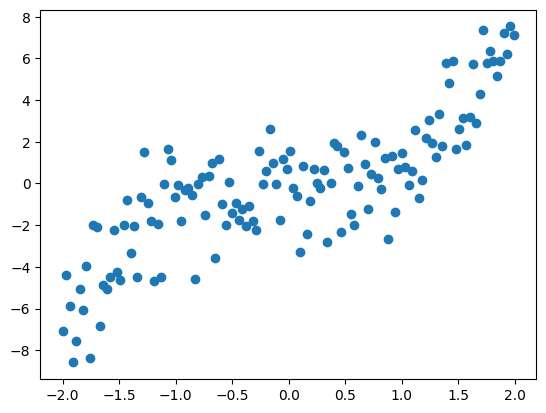

In [25]:
rng = np.random.default_rng(seed = 102)
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])
X_test = np.column_stack((np.ones(Xnew.shape[0]), Xnew.reshape(-1, 1))).T
y_test = ynew.reshape(-1, 1)
plt.scatter(Xnew,ynew)

## Question 19

Find the loss for the test data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point.



Mean Squared Error (MSE) on Test Data: 13.905206102356317


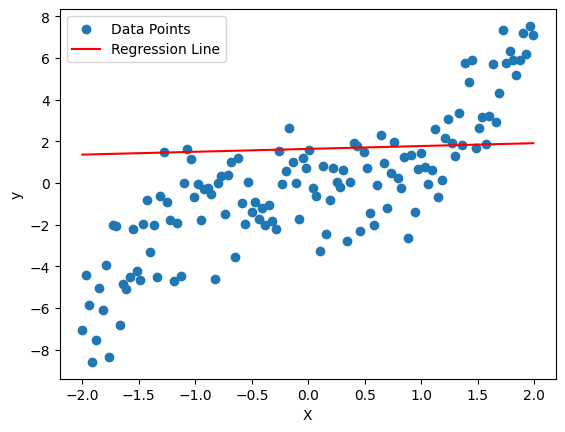

In [26]:
# Set the random seed for reproducibility
rng = np.random.default_rng(seed=102)

# Generate test data
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])

# Create the feature matrix and target vector
X_test = np.column_stack((np.ones(Xnew.shape[0]), Xnew)).T
y_test = ynew.reshape(-1, 1)

# Define a linear regression model
def linear_regression(X, theta):
    return np.dot(theta.T, X)

# Calculate the loss (mean squared error)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Initialize model parameters (theta)
theta = np.random.randn(2, 1)

# Make predictions using the model
y_pred = linear_regression(X_test, theta)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE) on Test Data:", mse)

# Plot the data and regression line
plt.scatter(Xnew, ynew, label='Data Points')
plt.plot(Xnew, y_pred.flatten(), color='red', label='Regression Line')
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()